# TFE4188 - Lecture 10 - Oscillators

# Oscillations refresher


Assume a complex number

$$z = a + ib$$

What happens when we do

$$ y = e^{zt}$$

where $t$ is time?


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plotiqax(axsize):
    fig,ax = plt.subplots(1, 1)
    ax.axis([-axsize,axsize,-axsize,axsize])
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.grid(True)
    return ax

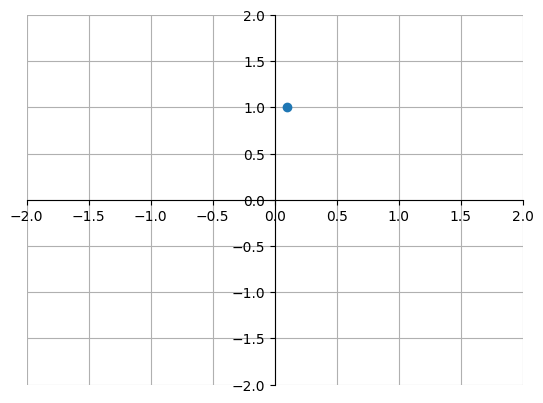

In [2]:
a = 0.1
b = 1
z = a + 1j*b
plotiqax(2).plot(a,b,marker="o")
pass

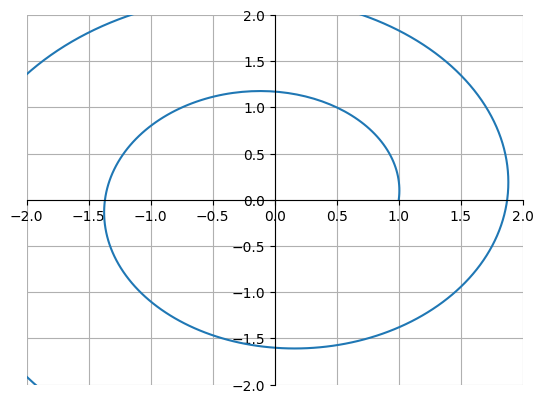

In [35]:
t = np.linspace(0,np.pi*10,1000)
z = 0.1 + 1j*1
y = np.exp(z*t)
plotiqax(2).plot(np.real(y),np.imag(y))
pass

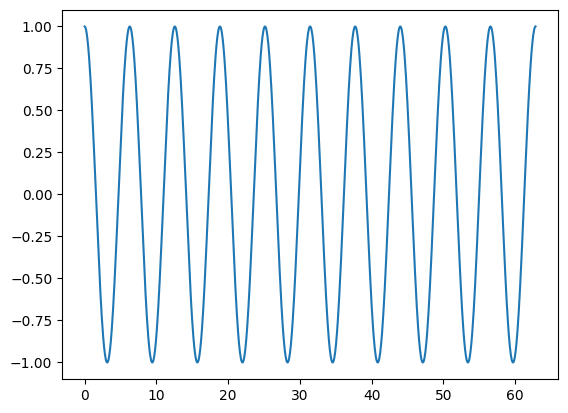

In [39]:
t1 = np.linspace(0,np.pi*20,1000)
a1 = 0
b1 = 1
z1 = a1 + 1j*b1
z2 = a1 - 1j*b1
y1 = (np.exp(z1*t1) + np.exp(z2*t1))/2
plt.plot(t1,np.real(y1))
pass

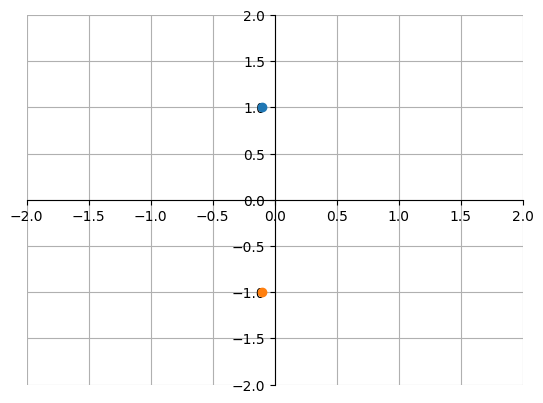

In [5]:
ax = plotiqax(2)
ax.plot(np.real(z1),np.imag(z1),marker="o")
ax.plot(np.real(z2),np.imag(z2),marker="o")
pass

# Crystal oscillator

A crystal is a piezo electric device, mechanical forces convert to a voltage and visa versa.

The great thing about crystals is that the mechanical resonance is accurate, relatively independent of environmental conditions, and has a high quality factor.


A common model of the crystal is shown below

<img src="../media/xosc_model.svg"  width="60%" height="60%">


## Am I wrong?

I have a problem with calculating input impedances and transfer functions. I don't trust my own brain when it comes the algebra of expanding symbolic functions. 

In [The Crystal Oscillator](https://ieeexplore.ieee.org/document/7954123) the input impedance is reported as (assuming $R_s = 0$)

$$ Z_{in} \approx \frac{L C_F s^2 + 1}{L C_F C_p s^2 + C_F + C_P}$$

When I compute $Z_{in}$ by hand I got 

$$ Z_{in} = \frac{s^2 C_F L + 1}{s^3 C_P L C_F + s C_P + s C_F}$$

So did I do it wrong? 

## Enter [Sympy](https://docs.sympy.org/latest/index.html)
Python is fantastic, especially the libraries. Imagine that someone has spent their time on making a symbolic library. 

Computers are fantastic at mundane algorithms like algebra. I love to use computers to verify whether I'm right or wrong.

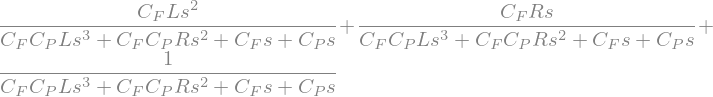

In [25]:
from sympy import *
init_printing()
#- Define the symbols
Gin,Zin,s,Cf,L,Cp,R,Z = symbols("G_{in} Z_{in} s C_F L C_P R Z")

#- Compute impedance
Gin = 1/(R + s*L + 1/(s*Cf)) + s*Cp
Zin = expand(simplify(1/Gin))
Zin

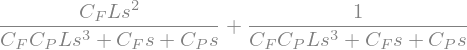

In [14]:
Zin.subs({R:0})

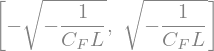

In [29]:
solve(Zin.subs({R:0}),s)

Nope, I was right. And probably so was Bezhad. Is my initial setup of the equations wrong?

Next, check the Impedance with some values.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy.utilities.lambdify import lambdify

#- Evaluate for some numerical values
Z = Zin.subs({R:50,Cf:5e-15,Cp:5e-12,L:50e-3})

#- Translate to numpy 
f = np.linspace(10.05e6,10.08e6,1000)
w = 1j*2*np.pi*f
func = lambdify(s, Z,'numpy') 
Znum = func(w)

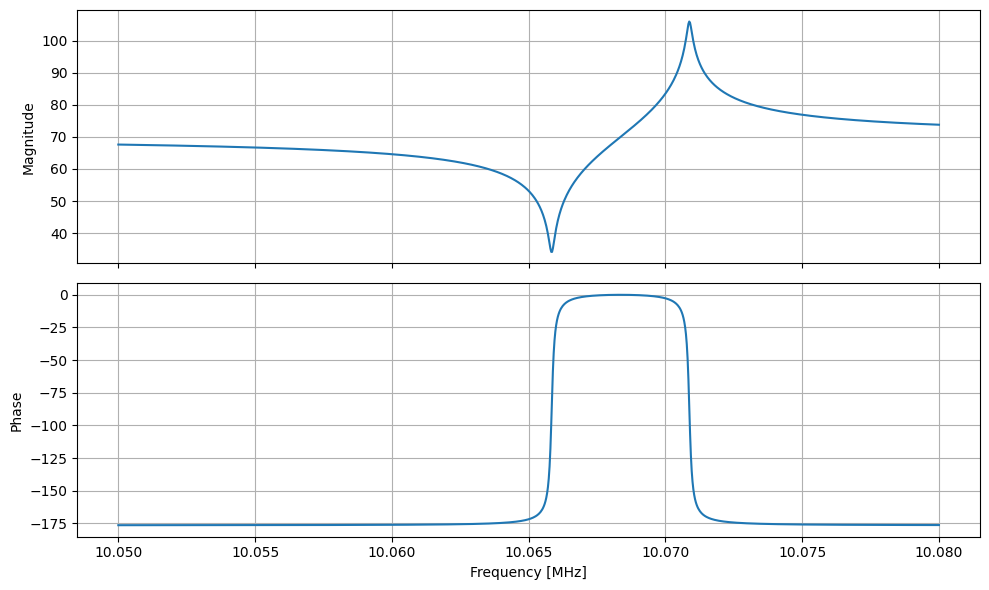

In [10]:
fig, ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
ax[0].plot(f*1e-6,20*np.log10(np.abs(Znum)))
ax[0].grid(True)
ax[0].set_ylabel("Magnitude")
ax[1].plot(f*1e-6,(np.angle(Znum) - np.max(np.angle(Znum)))/(np.pi*2)*360)
ax[1].set_xlabel("Frequency [MHz]")
ax[1].set_ylabel("Phase")
ax[1].grid(True)
plt.tight_layout()
plt.savefig("../media/xosc_res.svg")

## Discovery

Nope, I did everything right. The reason Bezhad ignores the $1/s$ is that when we look close to the resonance frequencies the impedance of the $1/sCp$ does not change much, as such ignore.

# Pierce oscillator

<img src="../media/xosc_pierce.svg"  width="40%" height="40%">

![](https://www.iqdfrequencyproducts.com/media/c/blg/411/1438250963/rc/2000/1047/90/quartz-crystal-stability-how-myths-and-misconceptions-mask-good-value.jpg)

# Ring oscillator

<img src="../media/osc_ring_adv.svg"  width="60%" height="60%">


# Digitally controlled oscillator
<img src="../media/osc_ring_cap.svg"  width="70%" height="70%">


# LC oscillators
<img src="../media/lcosc.svg"  width="50%" height="50%">


# RC oscillators
<img src="../media/rcosc.svg"  width="90%" height="90%">

## Questions

- Layout 
    